In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pylab as plt
import scipy as sp

## Logistic Regression Analysis
- 회귀 분석 문제와 분류 문제 모두에 사용할 수 있다.
- 로지스틱 회귀 분석 모형에서는 종속 변수가 이항 분포를 따르고 그 모수가 독립 변수에 의존한다고 가정한다.
- `p(y|x) = Bin(y|theta(x),N)`
- 로지스틱 함수는 y의 값이 구간내의 값(0~N)만 가질 수 있기 때문에 종속 변수가 이러한 특성을 가진 경우에 회귀 분석 방법으로 쓸 수 있다.

## 시그모이드 함수
- 함수 theta(x) 는 x에 대한 선형 함수를 0부터 1 사이의 값만 나올 수 있도록 시그모이드 함수라는 함수를 사용하여 변형한 것을 사용한다.
- theta = f(np.dot(w.T,x))
- 로지스틱 회귀 분석의 종속 변수는 0부터 1 사이의 값만 가지며 이에 따라 시그모이드 함수라 불리는 특별한 형태의 함수를 사용해야 한다.
    - 유한한 구간 (a,b) 사이의 한정된(bounded) 값과
    - 항상 0 또는 양의 기울기를 가지는 
- 함수의 집합을 가지는 특성(characteristic)을 가져야 한다.
    - 로지스틱 함수(Logistic Function)
    - 하이퍼볼릭 탄젠트 함수(Hyperbolic tangent)
    - 오차 함수(Error Function)

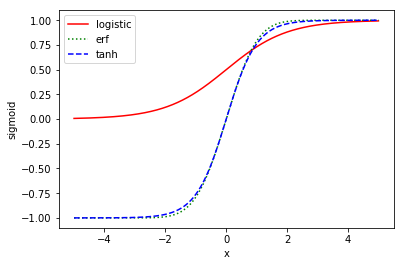

In [6]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="erf")
plt.plot(xx, np.tanh(xx), 'b--', label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.show()

In [7]:
from sklearn.datasets import make_classification

In [9]:
X0 ,y = make_classification(n_features=1, n_redundant= 0, n_informative=1, n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [10]:
logit_mod = sm.Logit(y,X)
# Binary choice logit model
logit_mod

In [12]:
logit_res = logit_mod.fit(disp=0)
logit_res

In [114]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.7679
Time:                        23:35:55   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression().fit(X0 ,y)

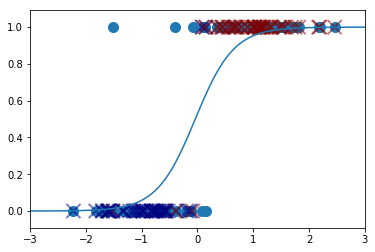

In [18]:
xx = np.linspace(-3, 3, 100)
theta = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))
plt.plot(xx, theta)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

In [19]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


In [20]:
model = sm.Logit.from_formula('InMichelin~Food + Decor + Service + Price',df)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            4
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.3428
Time:                        23:09:19   Log-Likelihood:                -74.198
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 6.213e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1975      2.309     -4.850      0.000     -15.723      -6.672
Food           0.4048      0.131      3.080      0.002       0.147       0.662
Decor          0.1000      0.089      1.121      0.2

In [21]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinFood.txt", sep="\t")
df.tail()

,Food,InMichelin,NotInMichelin,mi,proportion
9,24,6,1,7,0.86
10,25,11,1,12,0.92
11,26,1,1,2,0.50
12,27,6,1,7,0.86
13,28,4,0,4,1.00


In [23]:
X = sm.add_constant(df.Food)
y = df.proportion
model = sm.Logit(y,X)
result = model.fit(disp = 0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             proportion   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.4816
Time:                        23:10:42   Log-Likelihood:                -4.9712
converged:                       True   LL-Null:                       -9.5904
                                        LLR p-value:                  0.002370
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3600      5.211     -1.988      0.047     -20.574      -0.146
Food           0.4671      0.235      1.991      0.046       0.007       0.927


In [50]:
from sklearn.datasets import load_iris
iris = load_iris()

In [51]:
dfX0 = pd.DataFrame(iris.data,columns=iris.feature_names)
dfy = pd.DataFrame(iris.target,columns=['y'])

In [52]:
dfX0.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [53]:
dfy.tail()

,y
145,2
146,2
147,2
148,2
149,2


In [54]:
dfy = dfy[:100]
#  we gonna use only setosa,versicolor data

In [55]:
dfX0 = dfX0['sepal length (cm)']
#  we gonna use only sepal length data in independent variable 

In [57]:
dfX = sm.add_constant(dfX0)
dfX = dfX[:100]

In [58]:
dfy.shape

(100, 1)

In [59]:
dfX.shape

(100, 2)

In [61]:
model = sm.Logit(dfy,dfX)
model

In [62]:
result = model.fit(disp=0)
result

In [63]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.5368
Time:                        23:19:10   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 6.320e-18
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal length (cm)     5.1403      1.007      5.107      0.000       3.168       7.113


In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
y_true = dfy.values
y_true.shape

(100, 1)

In [79]:
y_pred = result.predict(dfX)
y_pred = y_pred.values
y_pred = y_pred.reshape(-1,1)

In [84]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.5).fit(y_pred)
y_pred = binarizer.transform(y_pred)

In [85]:
confusion_matrix(y_true,y_pred)

array([[45,  5],
       [ 6, 44]])

In [92]:
print(classification_report(y_true,y_pred,target_names = ['class0','class1']))

             precision    recall  f1-score   support

     class0       0.88      0.90      0.89        50
     class1       0.90      0.88      0.89        50

avg / total       0.89      0.89      0.89       100



In [103]:
model = LogisticRegression().fit(dfX,dfy)
y_hat = model.predict(dfX)

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
from sklearn.metrics import roc_curve

In [93]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [106]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(dfy, model.decision_function(dfX))
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02,
        0.06, 0.06, 0.1 , 0.2 , 0.22, 0.28, 0.44, 0.6 , 0.68, 0.78, 0.82,
        0.9 , 0.92, 0.98, 1.  ]),
 array([0.02, 0.06, 0.12, 0.16, 0.18, 0.22, 0.28, 0.32, 0.48, 0.52, 0.58,
        0.68, 0.78, 0.88, 0.9 , 0.9 , 0.92, 0.94, 0.98, 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  ]),
 array([ 1.5302653 ,  1.34497877,  1.2523355 ,  1.15969224,  1.06704897,
         0.97440571,  0.88176244,  0.78911917,  0.60383264,  0.51118938,
         0.41854611,  0.32590284,  0.23325958,  0.14061631,  0.04797305,
        -0.04467022, -0.13731348, -0.22995675, -0.32260002, -0.41524328,
        -0.50788655, -0.60052981, -0.69317308, -0.78581635, -0.87845961,
        -0.97110288]))

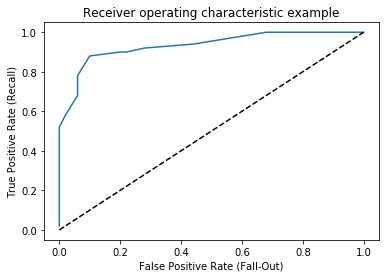

In [107]:
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [109]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9325999999999999

In [164]:
from sklearn.datasets import load_iris
iris = load_iris()

In [165]:
dfX0 = pd.DataFrame(iris.data,columns=iris.feature_names)
dfy = pd.DataFrame(iris.target,columns=['y'])

In [166]:
dfX0 = dfX0[:100]

In [167]:
dfy = dfy[:100]

In [168]:
dfX0.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1
99,5.7,2.8,4.1,1.3


In [169]:
dfX0['sepal_length'] = dfX0['sepal length (cm)']
dfX0['sepal_width'] = dfX0['sepal width (cm)']
dfX0['petal_length'] = dfX0['petal length (cm)']
dfX0['petal_width'] = dfX0['petal width (cm)']
dfX0.drop(columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],inplace=True)

In [170]:
dfX0.tail()

,sepal_length,sepal_width,petal_length,petal_width
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1
99,5.7,2.8,4.1,1.3


In [171]:
dfX = sm.add_constant(dfX0)

In [172]:
df = pd.concat([dfX0,dfy],axis=1)

In [180]:
model = LogisticRegression().fit(dfX0,dfy)

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
y_true = dfy.values

In [181]:
y_pred = model.predict(dfX0)

In [182]:
y_true.shape,y_pred.shape

((100, 1), (100,))

In [183]:
print(classification_report(y_true,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100



In [184]:
from sklearn.metrics import confusion_matrix

In [185]:
confusion_matrix(y_true,y_pred)

array([[50,  0],
       [ 0, 50]])

In [186]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [190]:
fpr, tpr, thresholds = roc_curve(dfy.values,model.decision_function(dfX0))

In [193]:
model.decision_function(dfX0)[:10]

array([-4.11328425, -3.3013589 , -3.73608488, -3.10125131, -4.21864487,
       -3.94615181, -3.66269166, -3.70245541, -2.9516078 , -3.32428804])

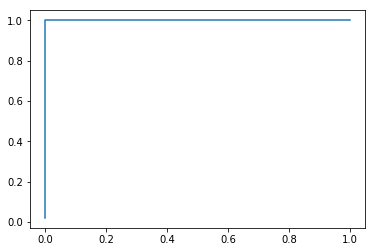

In [191]:
plt.plot(fpr,tpr)

- fpr : true postivie rate (recall)
- tpr : false positive rate(fall-out)

In [194]:
from sklearn.metrics import auc
auc(fpr,tpr)

1.0